In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,classification_report

import numpy as np

In [6]:
df=pd.read_csv('/content/BankNote_Authentication.csv')

In [7]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
df.isnull().sum()


variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
fake_notes=(df['class']==0).sum()
total_records=(df['class']==1).sum()
print(0,fake_notes)
print(1,total_records)

0 762
1 610


In [10]:
print(0,(df['class']==0).sum())
print(1,(df['class']==0).sum())

0 762
1 762


In [11]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


(array([ 21.,  41., 112., 220., 200., 230., 183., 214., 131.,  20.]),
 array([-7.0421 , -5.65541, -4.26872, -2.88203, -1.49534, -0.10865,
         1.27804,  2.66473,  4.05142,  5.43811,  6.8248 ]),
 <a list of 10 Patch objects>)

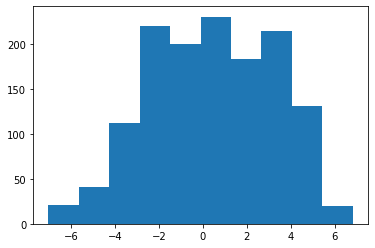

In [12]:
plt.hist(df['variance'])

(array([ 30.,  37., 100., 128., 113., 272., 247., 162., 209.,  74.]),
 array([-13.7731 , -11.10063,  -8.42816,  -5.75569,  -3.08322,  -0.41075,
          2.26172,   4.93419,   7.60666,  10.27913,  12.9516 ]),
 <a list of 10 Patch objects>)

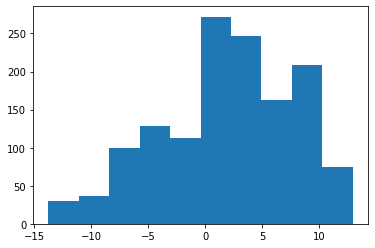

In [13]:
plt.hist(df['skewness'])

(array([198., 257., 391., 224., 116.,  84.,  56.,  25.,   7.,  14.]),
 array([-5.2861 , -2.96475, -0.6434 ,  1.67795,  3.9993 ,  6.32065,
         8.642  , 10.96335, 13.2847 , 15.60605, 17.9274 ]),
 <a list of 10 Patch objects>)

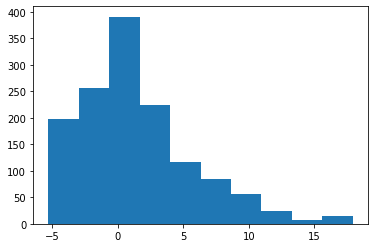

In [14]:
plt.hist(df['curtosis'])

(array([ 16.,  25.,  35.,  72., 124., 120., 220., 363., 343.,  54.]),
 array([-8.5482 , -7.44843, -6.34866, -5.24889, -4.14912, -3.04935,
        -1.94958, -0.84981,  0.24996,  1.34973,  2.4495 ]),
 <a list of 10 Patch objects>)

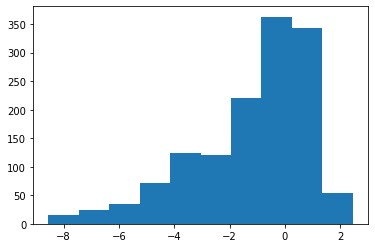

In [15]:
plt.hist(df['entropy'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f67884ba0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f67884c2110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f67884ca150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f67884c2bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f67884ba650>,
  <matplotlib.lines.Line2D at 0x7f67884bab90>]}

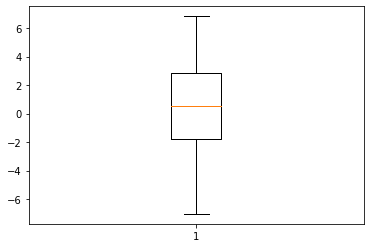

In [16]:
plt.boxplot(df['variance'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f6788429050>],
 'caps': [<matplotlib.lines.Line2D at 0x7f67884320d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f678843a110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6788432b90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6788429610>,
  <matplotlib.lines.Line2D at 0x7f6788429b50>]}

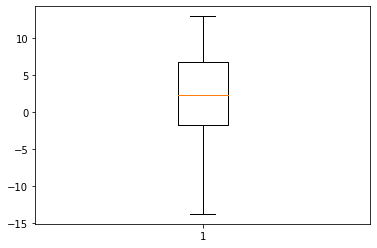

In [17]:
plt.boxplot(df['skewness'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f67884168d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f678841a950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f67883a2990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f67883a2450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6788416e90>,
  <matplotlib.lines.Line2D at 0x7f678841a410>]}

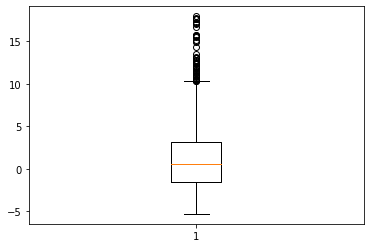

In [18]:
plt.boxplot(df['curtosis'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f678837ca90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6788383b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f678838bb50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f678838b610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6788383090>,
  <matplotlib.lines.Line2D at 0x7f67883835d0>]}

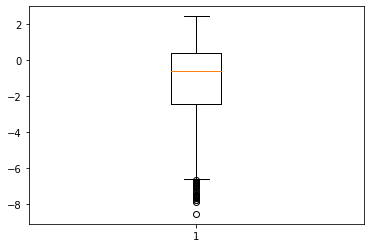

In [19]:
plt.boxplot(df['entropy'])

In [21]:
target=df['class']
features=df.drop('class',axis=1)
features

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [22]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['variance', 'skewness', 'curtosis', 'entropy']
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(features[numerical])
features.head()

,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 5)

In [25]:
print(X_train.shape)
print(X_test.shape)

(823, 4)
(549, 4)


In [26]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [27]:
accuracy=fake_notes/total_records
precision = accuracy
recall = 1
beta = 2
fscore = (1 + beta ** 2) * precision * recall /(beta ** 2 * precision + recall)
print(accuracy,fscore)

1.2491803278688525 1.041552761071624


In [28]:
model = Sequential()

In [29]:
model.add(Dense(4,input_dim = 4,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


In [74]:

history=model.fit(scaled_X_train,y_train,epochs = 20,verbose = 2)


Epoch 1/20
26/26 - 0s - loss: 0.3229 - accuracy: 0.8821
Epoch 2/20
26/26 - 0s - loss: 0.3150 - accuracy: 0.8846
Epoch 3/20
26/26 - 0s - loss: 0.3134 - accuracy: 0.8894
Epoch 4/20
26/26 - 0s - loss: 0.3134 - accuracy: 0.8906
Epoch 5/20
26/26 - 0s - loss: 0.3092 - accuracy: 0.8919
Epoch 6/20
26/26 - 0s - loss: 0.3101 - accuracy: 0.8894
Epoch 7/20
26/26 - 0s - loss: 0.3222 - accuracy: 0.8809
Epoch 8/20
26/26 - 0s - loss: 0.3123 - accuracy: 0.8906
Epoch 9/20
26/26 - 0s - loss: 0.3194 - accuracy: 0.8736
Epoch 10/20
26/26 - 0s - loss: 0.3153 - accuracy: 0.8894
Epoch 11/20
26/26 - 0s - loss: 0.3116 - accuracy: 0.8846
Epoch 12/20
26/26 - 0s - loss: 0.3163 - accuracy: 0.8809
Epoch 13/20
26/26 - 0s - loss: 0.3110 - accuracy: 0.8906
Epoch 14/20
26/26 - 0s - loss: 0.3087 - accuracy: 0.8870
Epoch 15/20
26/26 - 0s - loss: 0.3094 - accuracy: 0.8919
Epoch 16/20
26/26 - 0s - loss: 0.3076 - accuracy: 0.8931
Epoch 17/20
26/26 - 0s - loss: 0.3121 - accuracy: 0.8821
Epoch 18/20
26/26 - 0s - loss: 0.3086 - 

In [75]:
predictions = model.predict_classes(scaled_X_test)
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [76]:
confusion_matrix(y_test,predictions)

array([[257,  38],
       [ 39, 215]])

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       295
           1       0.84      0.80      0.82       254

    accuracy                           0.84       549
   macro avg       0.84      0.84      0.84       549
weighted avg       0.84      0.84      0.84       549

